In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('data/nba_adv_stats_and_salary.csv')
number_of_rows=float(len(df))

In [6]:
df=df.dropna()
number_of_complete_rows=float(len(df))
number_of_rows_lost=float(number_of_rows - number_of_complete_rows)

print('Number of Rows', number_of_rows)
print('Number of Complete Rows', number_of_complete_rows)
print('Number of Rows loss', number_of_rows_lost)
print('Precentage lost', float(number_of_rows_lost/ number_of_rows))

Number of Rows 19181.0
Number of Complete Rows 12879.0
Number of Rows loss 6302.0
Precentage lost 0.3285542985245816


Count of players in the dataset by Position

SF    2437
PG    2493
SG    2528
C     2700
PF    2721
Name: Pos, dtype: int64

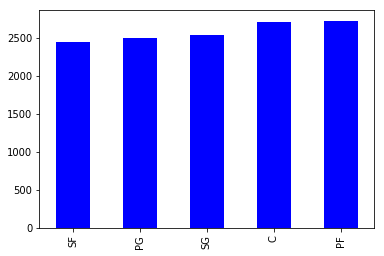

In [17]:
display(df.Pos.value_counts().sort_values())

df.Pos.value_counts().sort_values().plot(kind='bar', color='b')

If we look at the average salary by position, we see that the Center position usually make more.

,Pos,clean_Salary
2,PG,2.829749e+06
3,SF,3.108675e+06
4,SG,3.109164e+06
1,PF,3.434474e+06
0,C,3.623656e+06


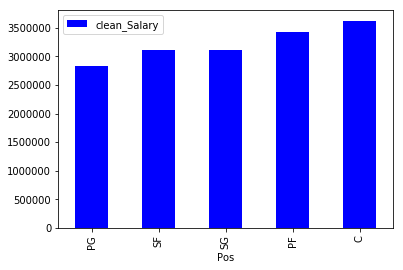

In [18]:
group_by_pos=df.groupby('Pos')
pos_avg_salary=group_by_pos['clean_Salary'].mean().reset_index()

display(pos_avg_salary.sort_values('clean_Salary', ascending=True))
pos_avg_salary.sort_values('clean_Salary', ascending=True).plot(x='Pos', y='clean_Salary', kind='bar',color='b')

We have seen that there's a difference in salary across Player positions, the graphs below looks at advanced stats against salary for each position. What we see here is that there is a positive trend for advanced stats and salary. The better your stat, the better your salary, which is something that I expected.

/Users/brandon.arcilla/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/brandon.arcilla/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


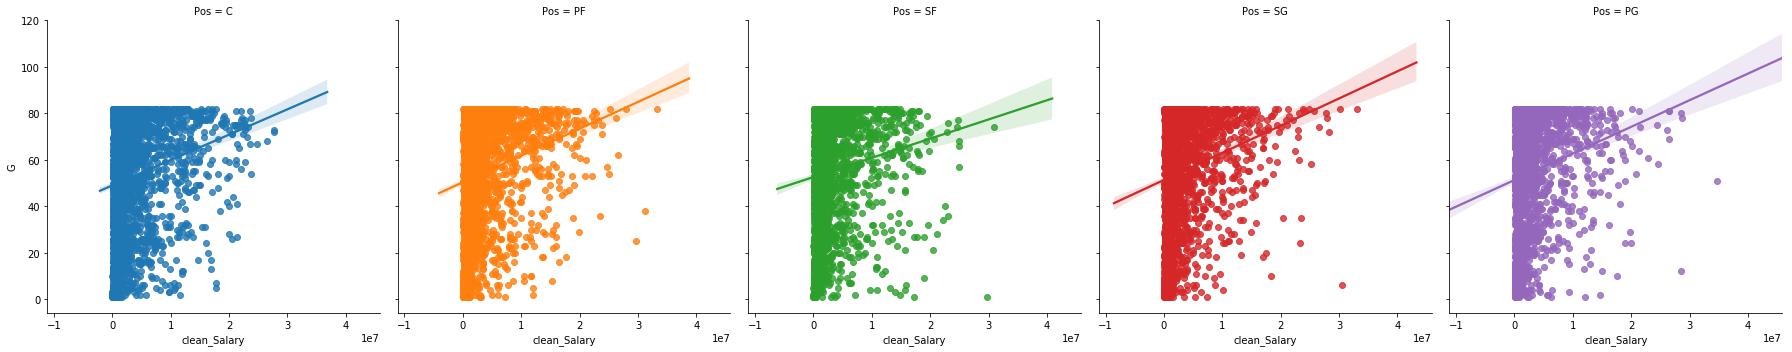

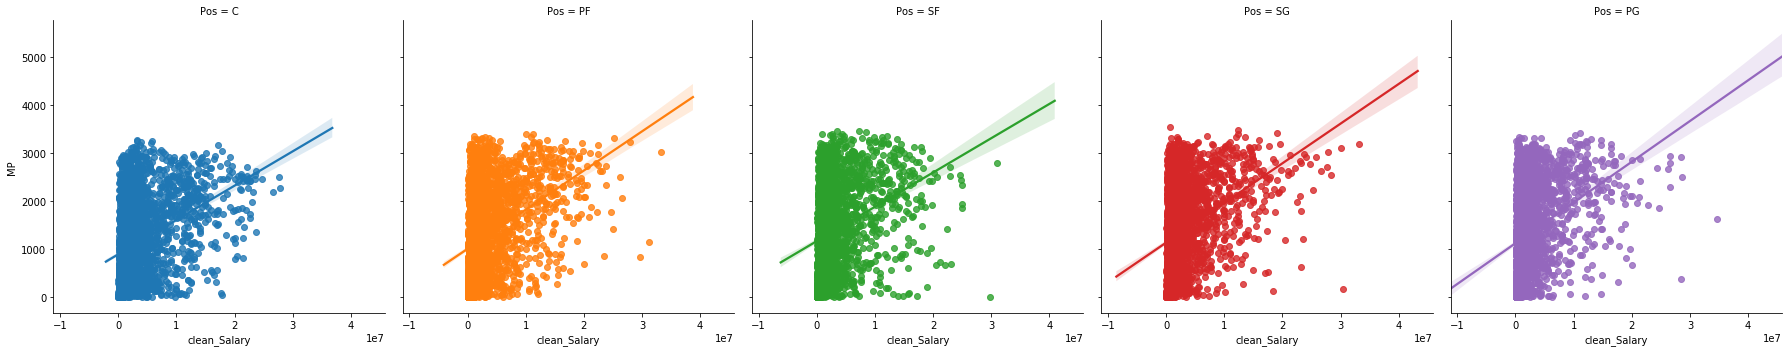

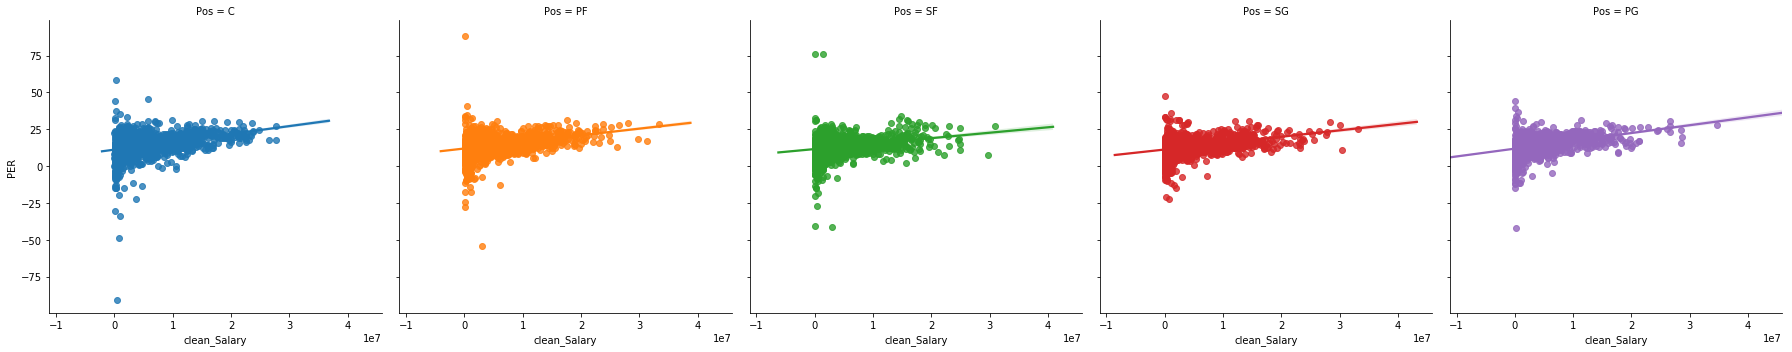

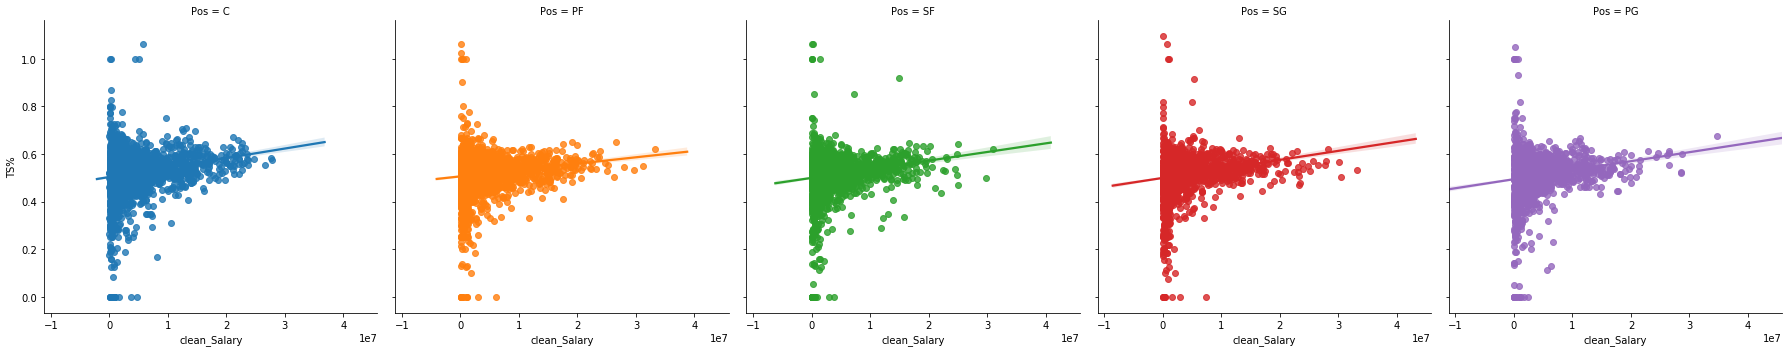

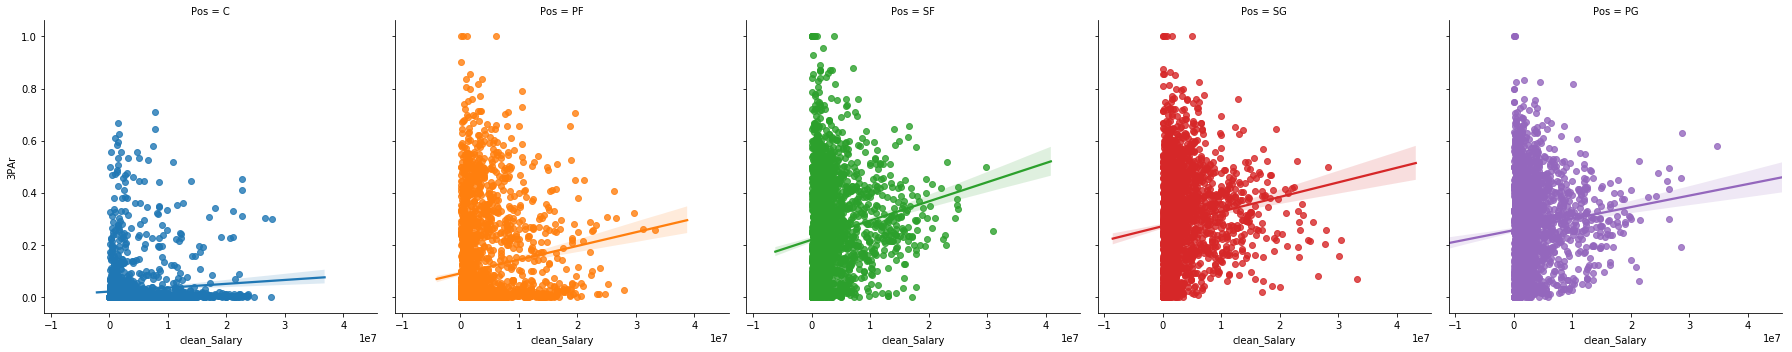

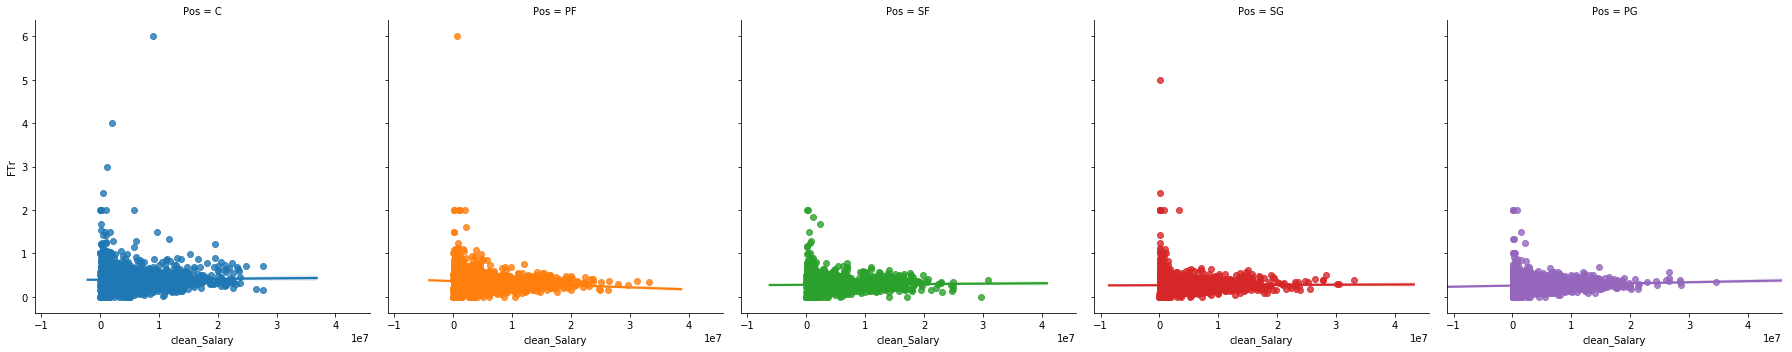

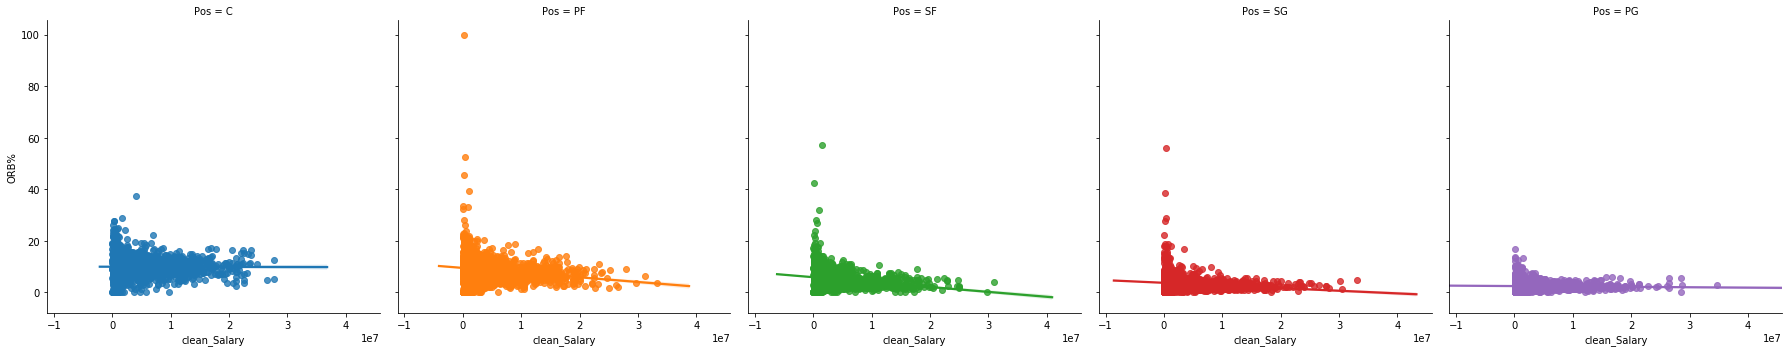

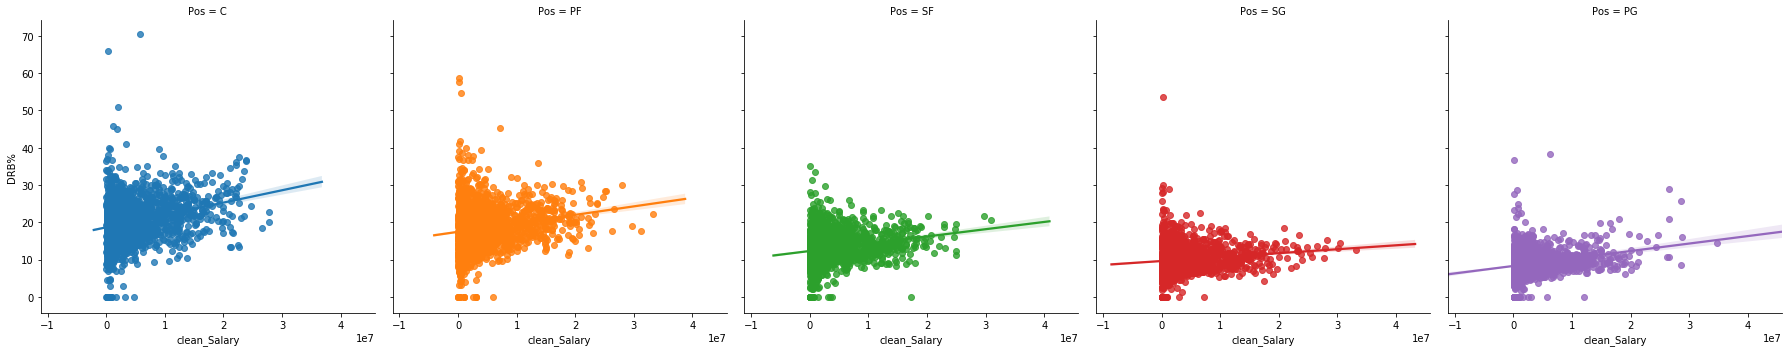

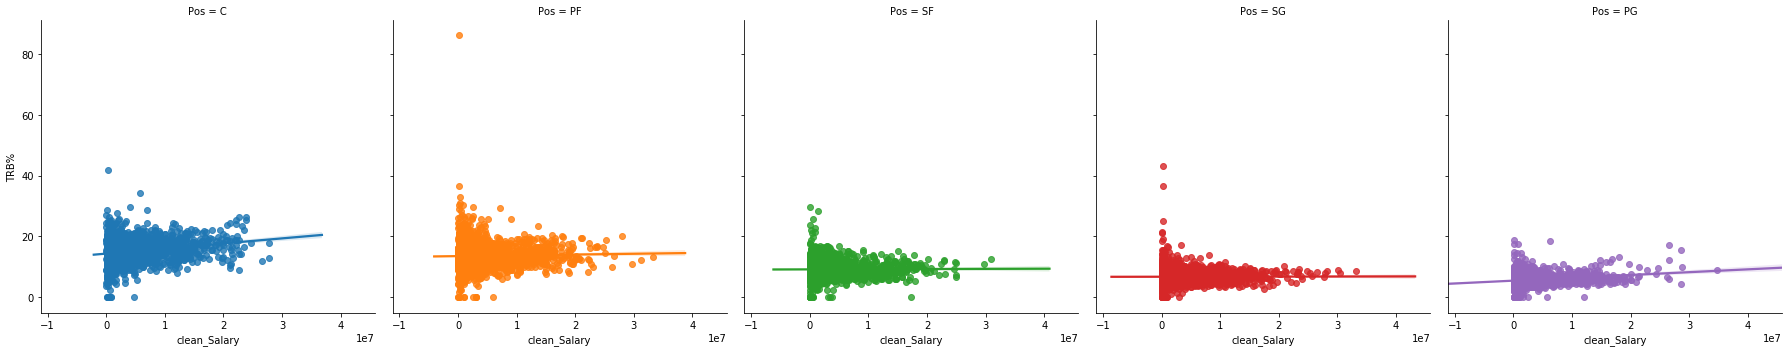

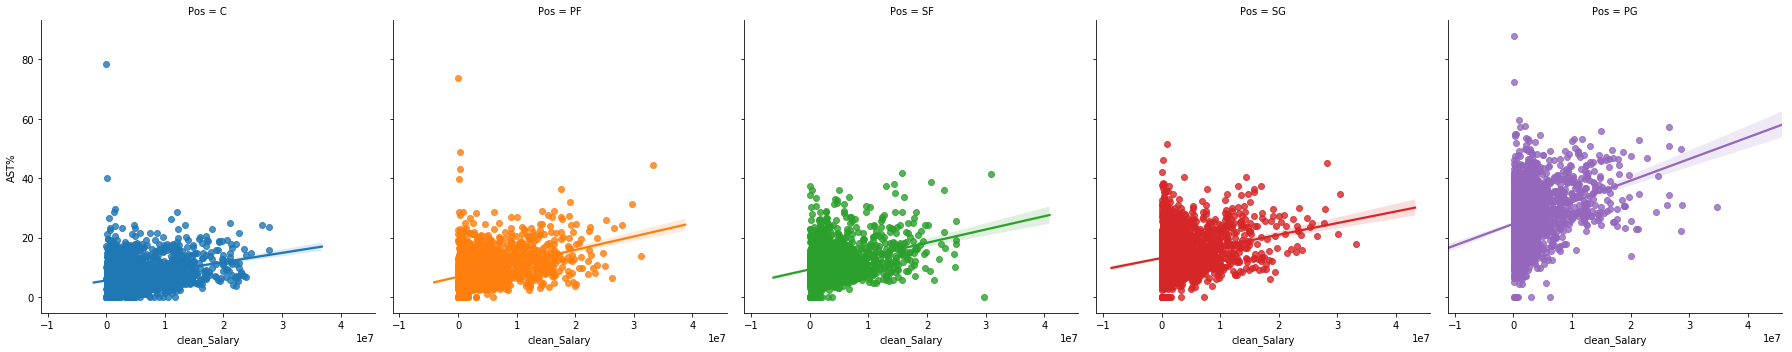

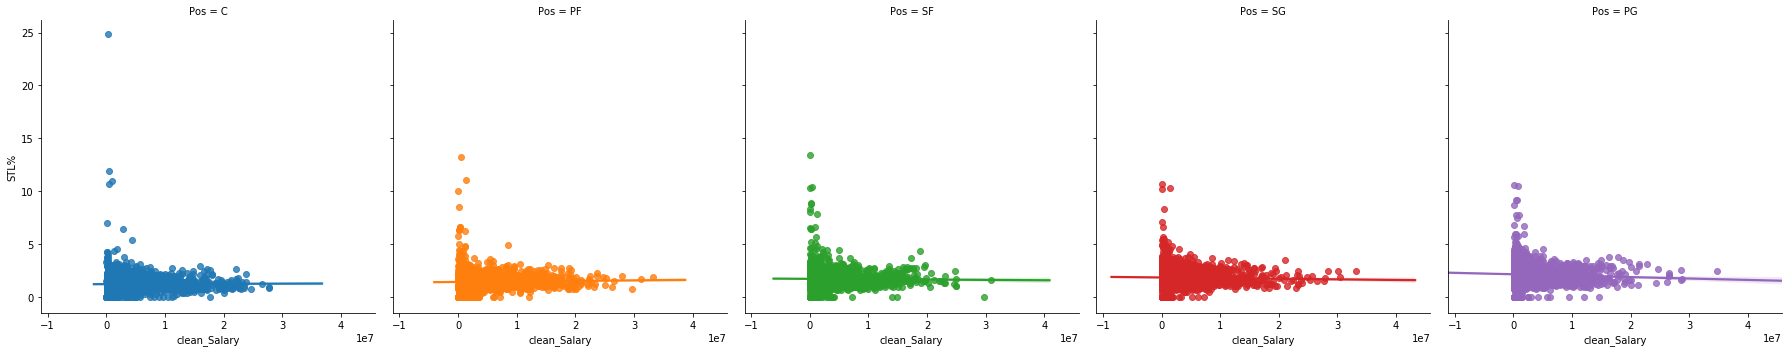

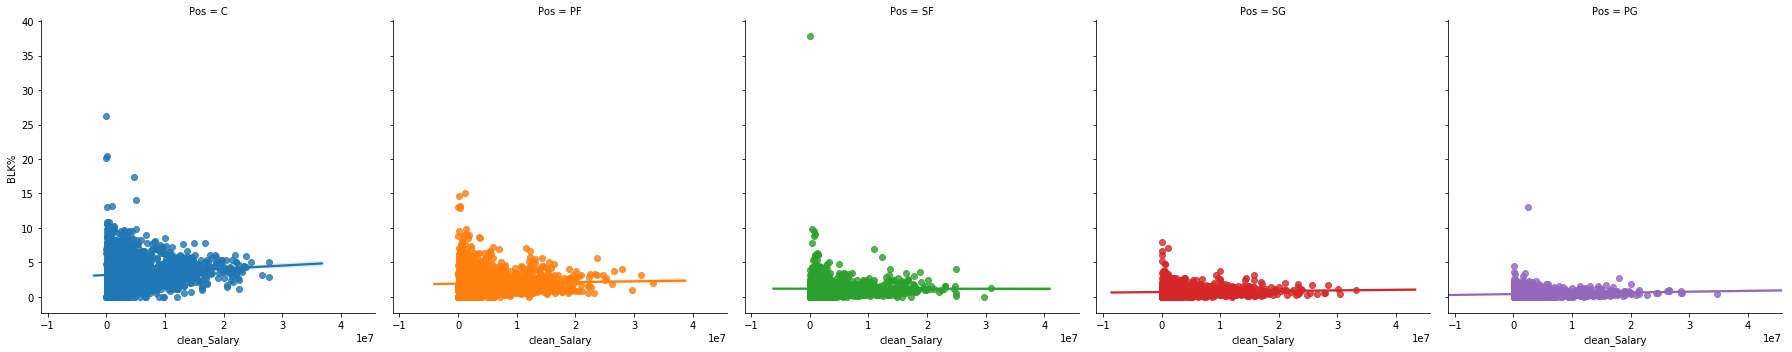

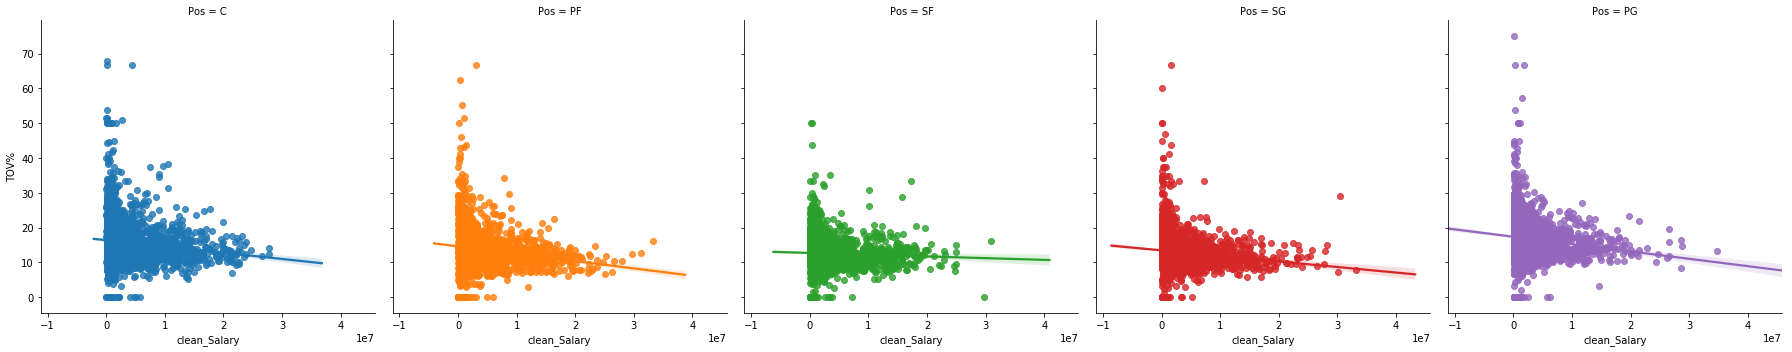

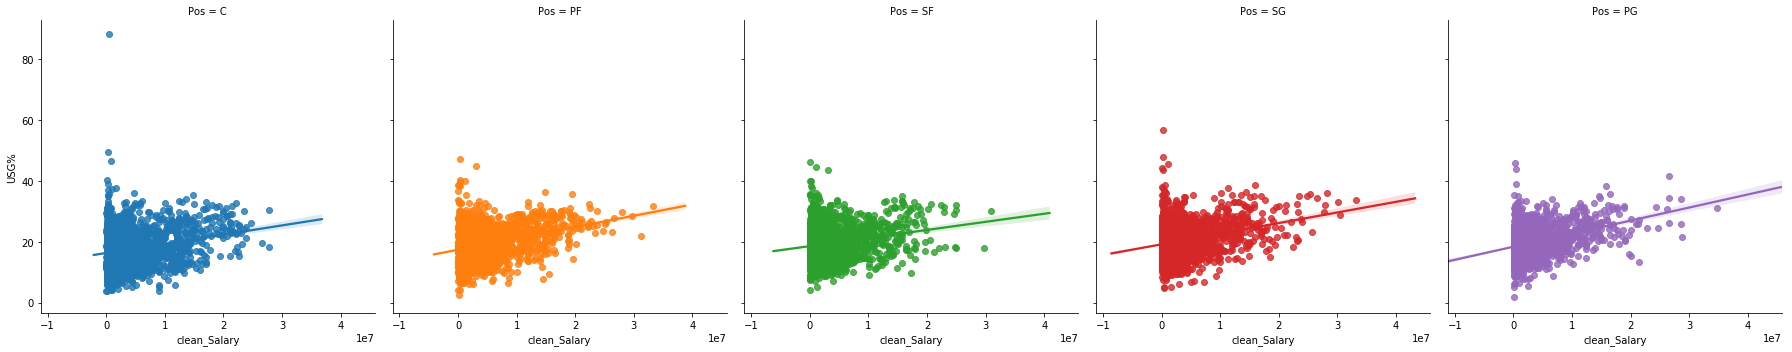

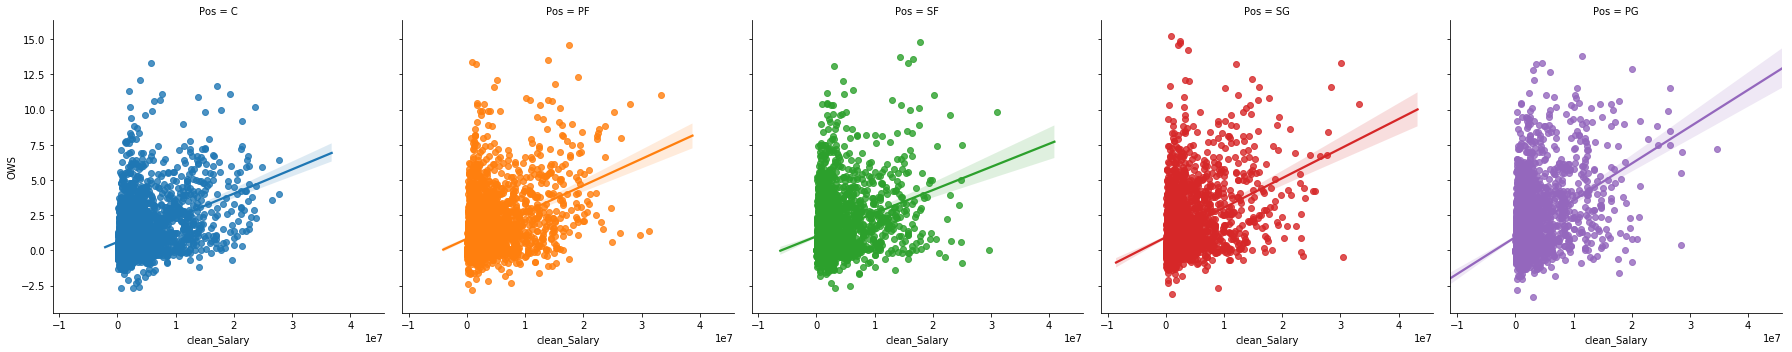

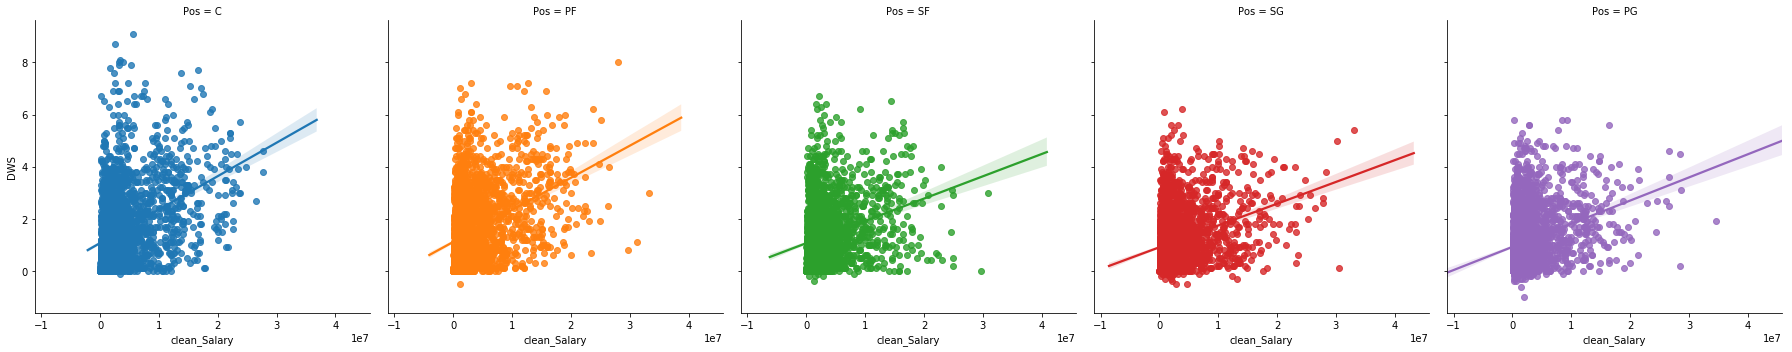

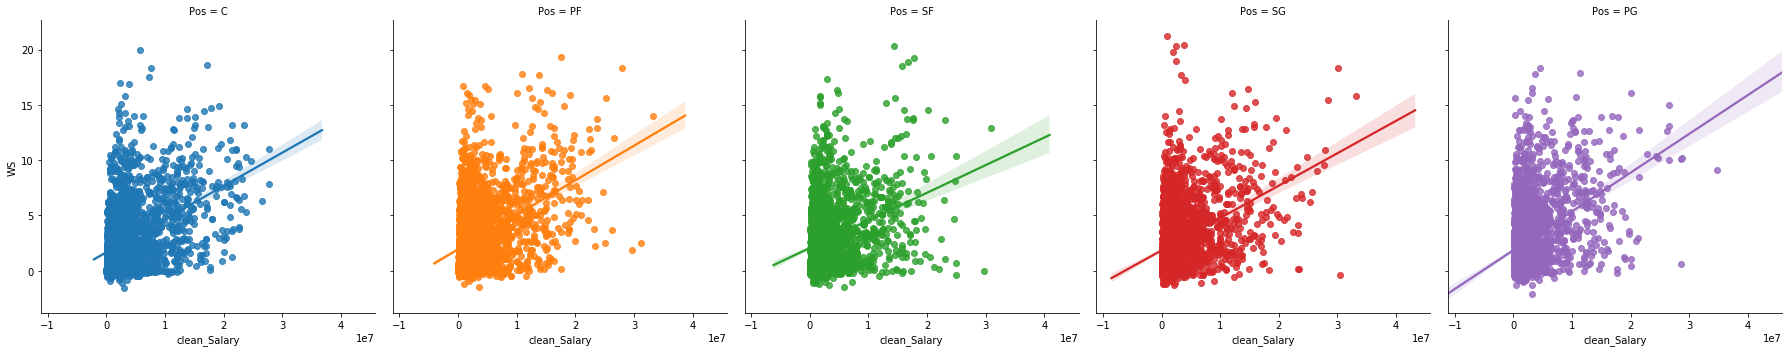

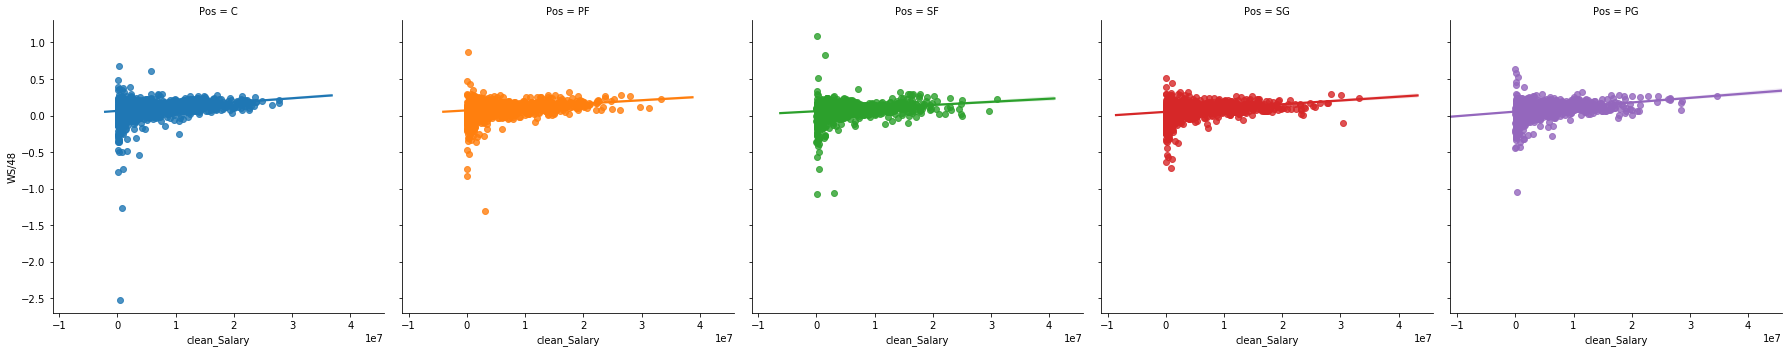

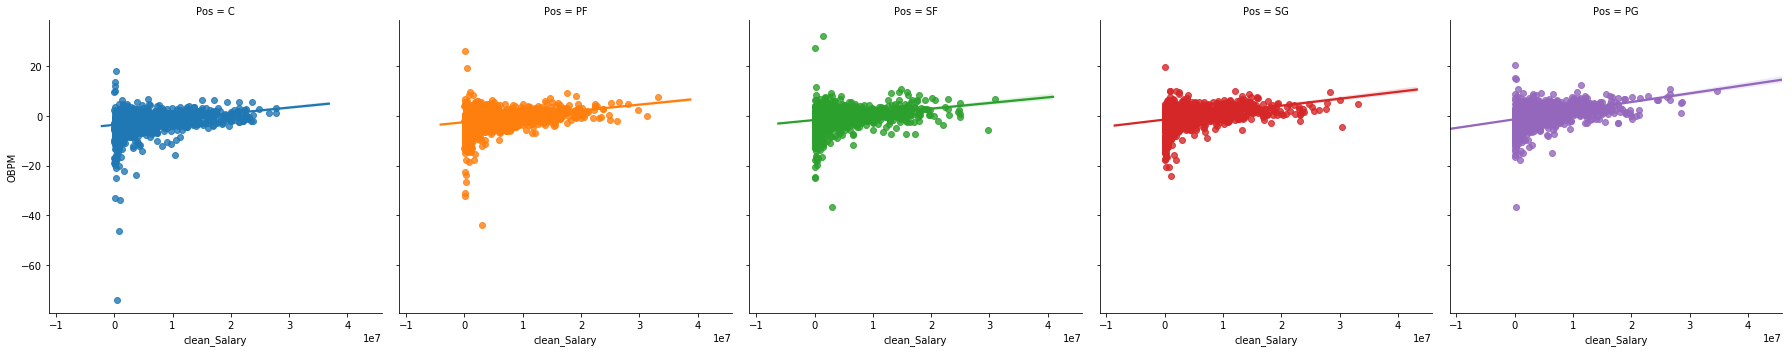

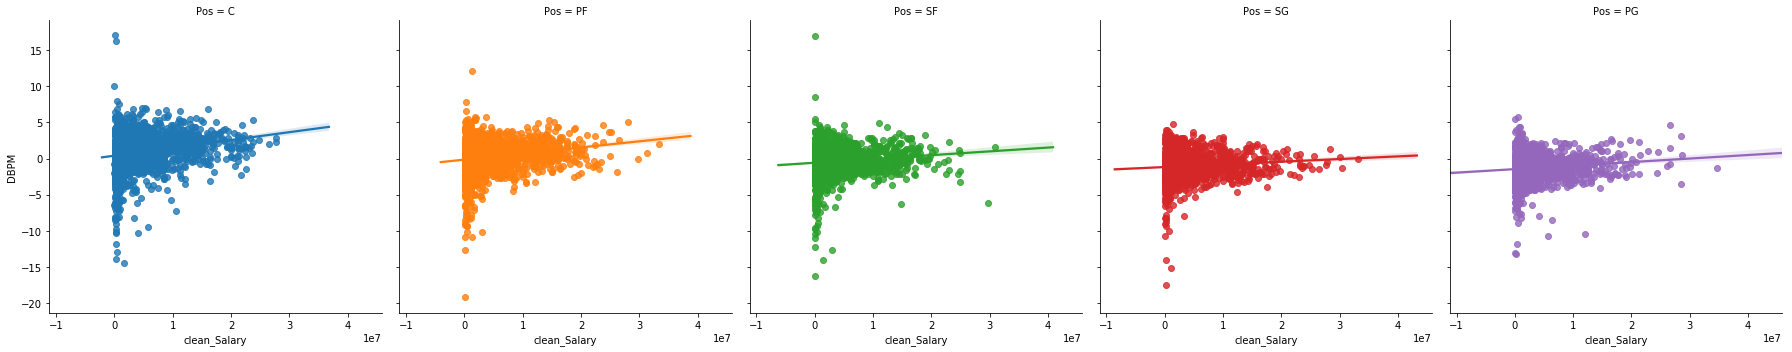

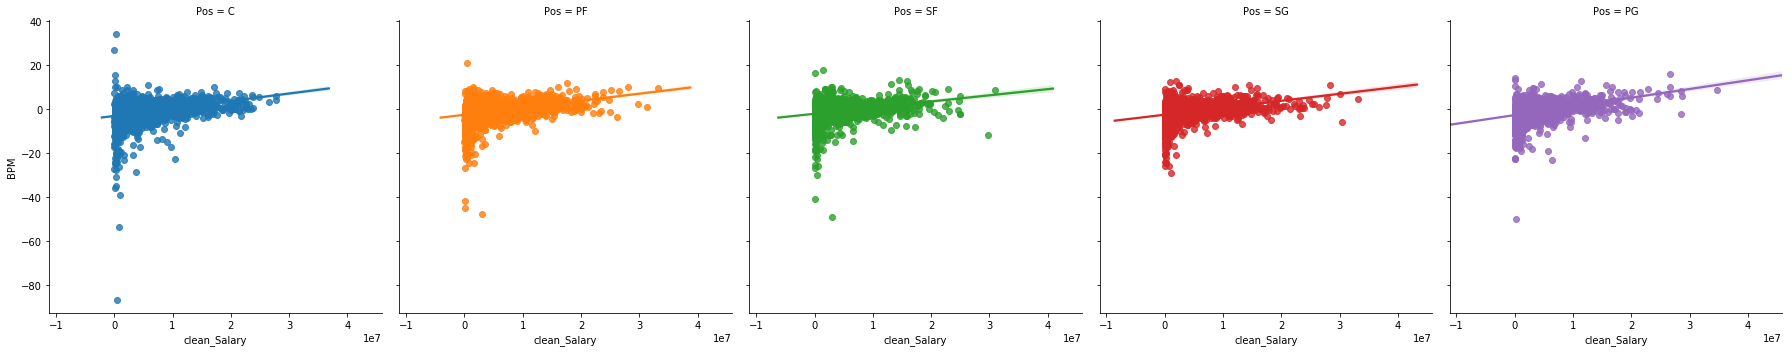

In [11]:
##pos
sns.lmplot(x='clean_Salary', y='G',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='MP',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='PER',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='TS%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='3PAr',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='FTr',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='ORB%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='DRB%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='TRB%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='AST%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='STL%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='BLK%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='TOV%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='USG%',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='OWS',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='DWS',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='WS',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='WS/48',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='OBPM',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='DBPM',data=df, hue='Pos', col='Pos')
sns.lmplot(x='clean_Salary', y='BPM',data=df, hue='Pos', col='Pos')


This is a time-series plot of average salary for each Position from 1984-2017.

What can be seen here is that salary for each position has increased over time. The odd thing about this graph is that there's a sharp uptick around 1989-1990 of salary.

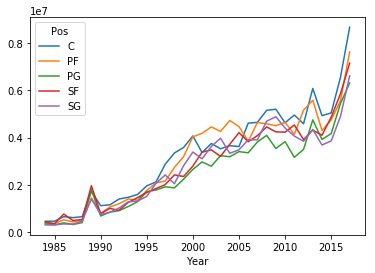

In [12]:
df.groupby(['Year','Pos']).mean()['clean_Salary'].unstack().plot()

I wanted to see why there was a sharp uptick around that year. The dataset for the year 1989 only has 64 players accounted for and an average salary that is higher.

In [13]:
df.groupby('Year').agg({'player_id':'count','clean_Salary':'mean'})

,player_id,clean_Salary
Year,,
1984,206,4.005534e+05
1985,287,3.729150e+05
1986,40,5.430333e+05
1987,295,4.576483e+05
1988,311,5.303875e+05
1989,64,1.670938e+06
1990,347,8.386110e+05
1991,346,9.928526e+05
1992,356,1.109885e+06


Top 10 of the highest paid NBA players for the dataset.

In [14]:
group_by_player=df.groupby(['Player','player_id']).agg({'clean_Salary':['sum', 'mean'],
                                                        'G':'sum',
                                                        'MP':['sum', 'mean'],
                                                        'PER':'mean',
                                                        'TS%':'mean', 
                                                        '3PAr':'mean',
                                                        'FTr':'mean',
                                                        'ORB%':'mean',
                                                        'DRB%':'mean',
                                                        'TRB%':'mean',
                                                        'AST%':'mean',
                                                        'STL%':'mean',
                                                        'BLK%':'mean',
                                                        'TOV%':'mean',
                                                        'USG%':'mean',
                                                        'OWS':'mean',
                                                        'DWS':'mean',
                                                        'WS':'mean',
                                                        'WS/48':'mean',
                                                        'OBPM':'mean',
                                                        'DBPM':'mean', 
                                                        'BPM':'mean'}).sort_values([('clean_Salary','sum')], ascending=False).reset_index()

group_by_player.head(10)

Player  player_id clean_Salary                   G     MP  \
                                         sum          mean   sum    sum   
0      Kevin Garnett  garneke01  335872398.0  1.599392e+07  1420  49564   
1        Kobe Bryant  bryanko01  328238062.0  1.641190e+07  1346  48637   
2  Shaquille O'Neal*  onealsh01  292198327.0  1.537886e+07  1174  40973   
3      Dirk Nowitzki  nowitdi01  250371801.0  1.251859e+07  1471  50573   
4         Tim Duncan  duncati01  239709155.0  1.261627e+07  1392  47368   
5       LeBron James  jamesle01  237020472.0  1.580136e+07  1143  44298   
6    Carmelo Anthony  anthoca01  232001415.0  1.546676e+07  1004  36061   
7      Dwight Howard  howardw01  213765862.0  1.526899e+07  1035  35754   
8        Joe Johnson  johnsjo02  210535806.0  1.169643e+07  1215  42621   
9          Pau Gasol  gasolpa01  203449761.0  1.196763e+07  1157  39208   

                      PER       TS%      3PAr    ...         BLK%       TOV%  \
          mean       mean      mean      mean    ...         mean       mean   
0  2360.190476  21.619048  0.543381  0.025714    ...     2.976190  11.328571   
1  2431.850000  21.550000  0.543200  0.217850    ...     0.945000  12.825000   
2  2156.473684  25.500000  0.588632  0.001000    ...     4.452632  12.757895   
3  2528.650000  21.905000  0.572900  0.225150    ...     1.885000   8.545000   
4  2493.052632  23.931579  0.548421  0.007895    ...     4.584211  12.284211   
5  2953.200000  27.760000  0.587867  0.209400    ...     1.586667  13.146667   
6  2404.066667  20.413333  0.541200  0.198733    ...     1.073333  10.580000   
7  2553.857143  21.450000  0.597571  0.005714    ...     4.328571  16.850000   
8  2367.833333  14.933333  0.529944  0.318778    ...     0.422222  11.227778   
9  2306.352941  21.382353  0.566059  0.036588    ...     3.558824  12.435294   

        USG%        OWS       DWS         WS     WS/48      OBPM      DBPM  \
        mean       mean      mean       mean      mean      mean      mean   
0  23.509524   4.752381  4.290476   9.042857  0.173238  1.409524  3.209524   
1  31.330000   6.115000  2.530000   8.630000  0.144900  3.580000 -0.675000   
2  28.884211   6.068421  3.442105   9.500000  0.198789  2.810526  1.568421   
3  26.270000   7.210000  3.090000  10.305000  0.183650  2.680000  0.105000   
4  26.652632   5.263158  5.600000  10.857895  0.206105  1.257895  4.031579   
5  31.553333  10.320000  4.306667  14.640000  0.239267  7.333333  1.906667   
6  30.880000   4.240000  2.166667   6.406667  0.128133  2.313333 -1.313333   
7  22.821429   4.214286  4.964286   9.178571  0.169929 -0.478571  2.707143   
8  21.700000   3.144444  1.377778   4.522222  0.089778  1.355556 -1.266667   
9  23.305882   5.082353  3.105882   8.176471  0.169882  1.441176  2.117647   

        BPM  
       mean  
0  4.614286  
1  2.905000  
2  4.394737  
3  2.780000  
4  5.278947  
5  9.213333  
6  1.020000  
7  2.221429  
8  0.111111  
9  3.552941  

[10 rows x 26 columns]